<a href="https://colab.research.google.com/github/christofelkev/tugas-data-mining/blob/main/CHRISTOFEL_KEVIN_MANOPO_211011401468_UTS_DATAMINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Membaca data
data = pd.read_excel('data_pelanggan.xlsx', sheet_name='data_pelanggan')

# Ringkasan statistik
print("Statistik Deskriptif:")
print(data.describe())

# Distribusi kelas target
print("\nDistribusi Kelas Loyalitas:")
print(data['loyalitas'].value_counts(normalize=True))

Statistik Deskriptif:
             umur  pendapatan  pembelian_tahunan
count  100.000000  100.000000         100.000000
mean    38.790000   74.090000           6.660000
std     11.556008   26.947797           3.929222
min     20.000000   30.000000           1.000000
25%     28.000000   55.250000           3.000000
50%     39.500000   75.000000           6.000000
75%     47.250000   92.500000           9.000000
max     59.000000  119.000000          14.000000

Distribusi Kelas Loyalitas:
loyalitas
Tidak Loyal    0.7
Loyal          0.3
Name: proportion, dtype: float64


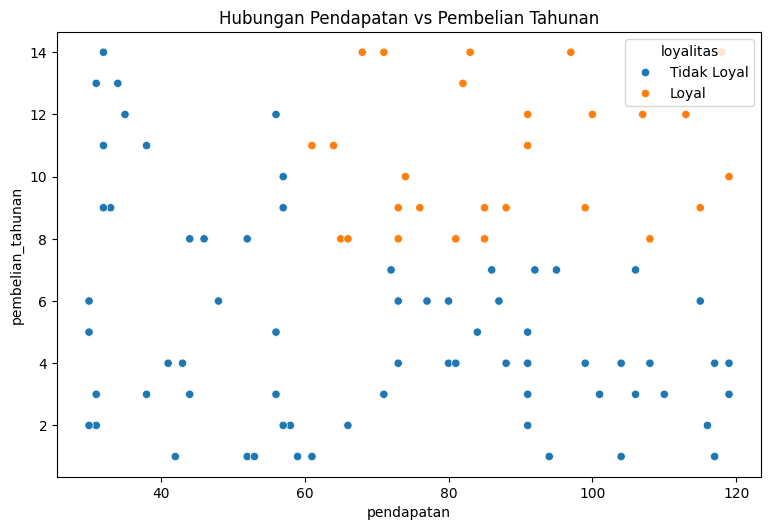

In [7]:
plt.figure(figsize=(15, 10))

# Hubungan Pendapatan dan Pembelian Tahunan
plt.subplot(2, 2, 1)
sns.scatterplot(x='pendapatan', y='pembelian_tahunan', hue='loyalitas', data=data)
plt.title('Hubungan Pendapatan vs Pembelian Tahunan')


plt.tight_layout()
plt.show()



## A. Decision Tree



In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


X = data[['umur', 'pendapatan', 'pembelian_tahunan']]
y = LabelEncoder().fit_transform(data['loyalitas'])


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res,
    test_size=0.3,
    random_state=42,
    stratify=y_res
)

dt_cv = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=2,
    random_state=42
)

cv_scores = cross_val_score(dt_cv, X_res, y_res, cv=5, scoring='accuracy')
print("Hasil Cross-Validation (5-fold):")
print(f"Setiap fold: {cv_scores}")
print(f"Rata-rata akurasi: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}\n")

dt = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=15,
    min_samples_leaf=10,
    max_features=2,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))



Hasil Cross-Validation (5-fold):
Setiap fold: [0.92857143 0.89285714 0.92857143 0.85714286 0.92857143]
Rata-rata akurasi: 0.91 ± 0.03

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      0.86      0.92        21

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42

Confusion Matrix:
[[21  0]
 [ 3 18]]


## B. KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Pipeline dengan scaling dan KNN
knn_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=15, weights='distance'))
])

knn_pipe.fit(X_train, y_train)
y_pred_knn = knn_pipe.predict(X_test)

print("\nKNN Performance:")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Performance:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        23
           1       1.00      0.68      0.81        19

    accuracy                           0.86        42
   macro avg       0.90      0.84      0.85        42
weighted avg       0.89      0.86      0.85        42

Confusion Matrix:
[[23  0]
 [ 6 13]]


## Analisis Perbandingan decision tree dan knn


In [17]:

# Kuantitatif
print("\nPerbandingan Kuantitatif:")
print("Decision Tree:")
print(f"Akurasi rata-rata cross-validation: {np.mean(cv_scores):.2f}")
dt_accuracy = np.mean(cv_scores)

print("\nKNN:")
knn_accuracy = knn_pipe.score(X_test,y_test)
print(f"Akurasi pada data uji: {knn_accuracy:.2f}")

# Perbandingan akurasi
print(f"\nSelisih akurasi: {abs(dt_accuracy-knn_accuracy):.2f}")
if dt_accuracy > knn_accuracy :
  print("Decision Tree memiliki akurasi lebih tinggi")
elif knn_accuracy > dt_accuracy :
  print("KNN memiliki akurasi lebih tinggi")
else :
  print("Keduanya memiliki akurasi yang sama")





Perbandingan Kuantitatif:
Decision Tree:
Akurasi rata-rata cross-validation: 0.91

KNN:
Akurasi pada data uji: 0.95

Selisih akurasi: 0.05
KNN memiliki akurasi lebih tinggi


# Perbandingan Kualitatif

## Decision Tree
###Kelebihan: Mudah dipahami dan diinterpretasi, mampu menangani data kategorikal dan numerik.
###Kekurangan: Rentan terhadap overfitting, sensitif terhadap noise dan outlier.

## KNN
###Kelebihan: Sederhana, tidak memerlukan asumsi distribusi data, performanya baik untuk data non-linear.
###Kekurangan: Membutuhkan komputasi yang tinggi untuk data besar, sensitif terhadap skala fitur, sulit menentukan nilai k yang optimal.

## Kesimpulan

Berdasarkan hasil analisis, baik Decision Tree maupun KNN memiliki performa yang cukup baik dalam memprediksi loyalitas pelanggan.Pemilihan model terbaik bergantung pada prioritas dan karakteristik data. Jika interpretasi model mudah dipahami menjadi prioritas, Decision Tree bisa menjadi pilihan. Jika akurasi menjadi prioritas utama, maka perlu dilakukan tuning lebih lanjut terhadap parameter KNN
